## Observations and Insights 

In [275]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete_df = pd.merge(mouse_metadata,study_results, on="Mouse ID", how ='outer')
study_data_complete_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [244]:
# Checking the number of mice in the DataFrame.
unique_mice = merge_data_df["Mouse ID"].nunique()
unique_mice

249

In [245]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_number = study_data_complete_df[["Mouse ID","Timepoint"]].copy()
duplicate_number

# duplicate_mices = duplicate_number["Mouse ID"].nunique()
# duplicate_mices


,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [60]:
# Optional: Get all the data for the duplicate mouse ID. 


In [250]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_complete_df.sort_values("Mouse ID")
clean_study_data_complete_df = study_data_complete_df.drop_duplicates(subset = "Mouse ID", keep = 'first')
clean_study_data_complete_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [251]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = clean_study_data_complete_df["Mouse ID"].count()
new_mice_count


249

## Summary Statistics

In [255]:
# Sort merged database by Tumor Volume to allow for median values to be correct
study_data_complete_df = study_data_complete_df.sort_values(["Tumor Volume (mm3)"], ascending=True)

study_data_complete_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
7,k403,Ramicane,Male,21,16,35,26.546993,1


In [261]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.


#analytics summary 
regimen_grouped= study_data_complete_df.groupby(["Drug Regimen"])

mean = regimen_grouped["Tumor Volume (mm3)"].mean()

median = regimen_grouped["Tumor Volume (mm3)"].median()

variance = regimen_grouped["Tumor Volume (mm3)"].var()

std = regimen_grouped["Tumor Volume (mm3)"].std()

sem = regimen_grouped["Tumor Volume (mm3)"].sem()



In [262]:
# Create Summary Data Frame
summary_df = pd.DataFrame({"Mean":mean,"Median":median, "Variance": variance,"Standard Deviation": std, "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [264]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

stats=summary_df.describe
stats


<bound method NDFrame.describe of                    Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.322552  50.854632  42.351070            6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398>

## Bar Plots

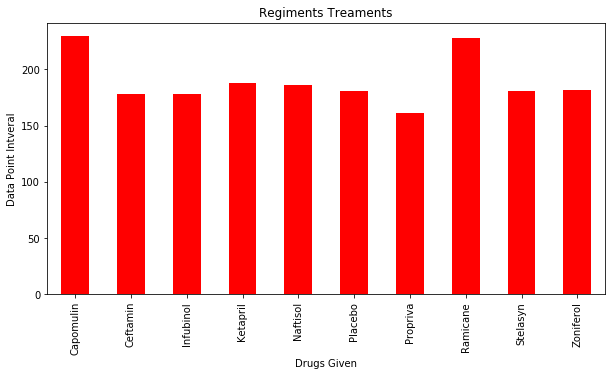

<Figure size 432x288 with 0 Axes>

In [273]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.


#Calculate datapoints using the .count function so i use for my graph
bar_graph_data_points = study_data_complete_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
bar_graph_data_points

#The graph
bar_graph_data_points.plot(kind="bar", figsize=(10,5),color='red')

#styling
plt.title("Regiments Treaments")
plt.xlabel("Drugs Given")
plt.ylabel("Data Point Intveral")


plt.show()
plt.tight_layout()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

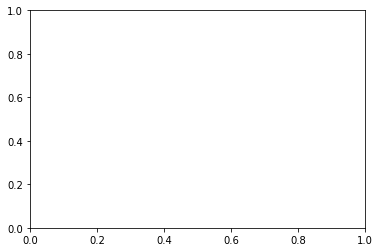

In [290]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

#Array of data points
time_points = [5,10,15,20,25,30,35,40,45]

timdata_points = study_data_complete_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

#define x_axis
x_axis = np.arange(len(bar_graph_data_points))

plt.bar(x_axis, time_points, color='b', alpha=0.75, align='center')

tick_loc = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(users)+10)

plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

## Pie Plots

In [291]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#show distribution of female versus male mice using pandas
mice_gender_df = pd.DataFrame(study_data_complete_df.groupby(["Sex"]).count()).reset_index()
mice_gender_df.head()


,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [292]:
mice_gender_df = mice_gender_df[["Sex", "Mouse ID"]]
mice_gender_df = mice_gender_df.rename(columns={"Mouse ID": "Mouse Count"})
mice_gender_df.head()

,Sex,Mouse Count
0,Female,935
1,Male,958


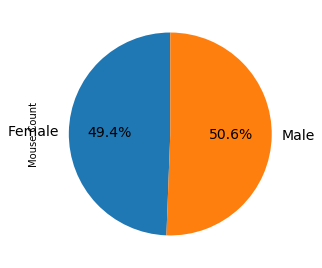

In [288]:
#chart
plt.figure(figsize=(10,6))
axl = plt.subplot(121, aspect='equal')
mice_gender_df.plot(kind='pie', y= "Mouse Count", ax=axl, autopct='%1.1f%%',startangle=90,labels = mice_gender_df['Sex'],legend= False, fontsize=14)

In [310]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice_gender_df = (study_data_complete_df.groupby(["Sex"])["Drug Regimen"].count())
mice_gender_df

Sex
Female    935
Male      958
Name: Drug Regimen, dtype: int64

In [311]:
labels = ["Males", "Females"]

explode = (0.1,0)

colors = ("red", "pink")



([<matplotlib.patches.Wedge at 0x1a1cd1b588>,
 [Text(-0.8321802144635229, 0.86456699604799, 'Males'),
  Text(0.7628318632582288, -0.7925197463773246, 'Females')],
 [Text(-0.48543845843705496, 0.5043307476946608, '49.4%'),
  Text(0.41609010723176115, -0.4322834980239952, '50.6%')])

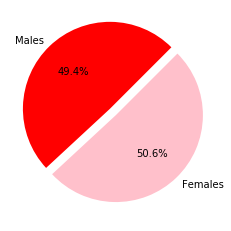

In [313]:
plt.pie(mice_gender_df, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", startangle=45)


## Quartiles, Outliers and Boxplots

In [317]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Data sort and volume selection based on individual mouse
data_sort_df = study_data_complete_df.sort_values(["Mouse ID", "Drug Regimen", "Timepoint"])

max_volume_df = data_sort_df.loc[data_sort_df["Timepoint"]==45]
max_volume_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
483,a262,Placebo,Female,17,29,45,70.717621,4
493,a275,Ceftamin,Female,20,28,45,62.999356,3
510,a401,Zoniferol,Female,8,25,45,66.794156,4


In [320]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# RAMICANE BOX PLOT
ramicane_df = max_volume_df[max_volume_df["Drug Regimen"].isin(["Ramicane"])]
ramicane_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,327,a411,Ramicane,Male,3,22,45,38.407618,1
1,430,a444,Ramicane,Female,10,25,45,43.047543,0
2,214,a520,Ramicane,Male,13,21,45,38.810366,1
3,174,a644,Ramicane,Female,7,17,45,32.978522,1
4,154,c758,Ramicane,Male,9,17,45,33.397653,1


In [323]:
#Execute conversion of the "Tumor Volume" into DF object for the Ramicane regimen.
ramicane_conv = ramicane_df.sort_values(["Tumor Volume (mm3)"], ascending = True)
ramicane_conv = ramicane_conv["Tumor Volume (mm3)"]
ramicane_conv

9      22.050126
49     29.128472
59     30.276232
74     30.564625
84     30.638696
114    31.095335
94     31.560470
174    32.978522
154    33.397653
184    33.562402
194    36.134852
254    36.374510
234    37.225650
272    37.311236
327    38.407618
214    38.810366
400    40.659006
410    40.667713
430    43.047543
420    45.220869
Name: Tumor Volume (mm3), dtype: float64

In [328]:
#Utalize pandas to define quartile calculation based if the DF contains the data
quartiles = ramicane_conv.quantile([.25,.5,.75])
upper_qrt = quartiles[0.75]
lower_qrt = quartiles[0.25]
int_qrt = upper_qrt - lower_qrt

print(f"The upper quartile temperature is: {upper_qrt}")
print(f"The lower quartile temperature is: {lower_qrt}")
print(f"The inter-quartile temperature is: {int_qrt}")
print(f"The median temperature is: {quartiles[0.5]}")

upper_bnd = upper_qrt - (1.5*int_qrt)
lower_bnd = lower_qrt - (1.5*int_qrt)
print(f"The values above {upper_bnd} are potential outliers.")
print(f"The values below {lower_bnd} are potential outliers.")

The upper quartile temperature is: 38.508305307499995
The lower quartile temperature is: 30.981175224999998
The inter-quartile temperature is: 7.527130082499998
The median temperature is: 34.848627300000004
The values above 27.217610183749997 are potential outliers.
The values below 19.690480101250003 are potential outliers.


{'whiskers': [<matplotlib.lines.Line2D at 0x1a1cf49588>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1cf1b9b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1cf374a8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1cf1bbe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1cf1b390>],
 'means': []}

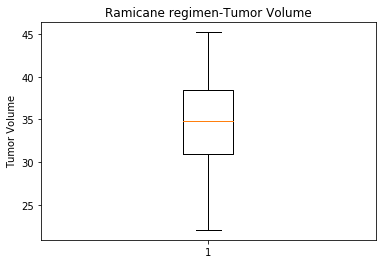

In [331]:
#Box and wisker plot of volume
figure1, axis1 = plt.subplots()
axis1.set_title ("Ramicane regimen-Tumor Volume")
axis1.set_ylabel ("Tumor Volume")
axis1.boxplot(ramicane_conv)

In [332]:
# INFUBINOL BOX PLOT
infubinol_df = max_volume_df[max_volume_df["Drug Regimen"].isin(["Infubinol"])]
infubinol_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,463,a203,Infubinol,Female,20,23,45,67.973419,2
1,473,a251,Infubinol,Female,21,25,45,65.525743,1
2,540,a685,Infubinol,Male,8,30,45,66.083066,3
3,637,c139,Infubinol,Male,11,28,45,72.226731,2
4,800,e476,Infubinol,Male,23,26,45,62.435404,1


In [333]:
#Execute conversion of the "Tumor Volume" into DF object for the infubinol regimen.
infubinol_conv = infubinol_df.sort_values(["Tumor Volume (mm3)"], ascending = True)
infubinol_conv = infubinol_conv["Tumor Volume (mm3)"]
infubinol_conv

834     60.918767
800     62.435404
1872    62.754451
473     65.525743
540     66.083066
1053    66.196912
1813    67.685569
463     67.973419
637     72.226731
Name: Tumor Volume (mm3), dtype: float64

In [335]:
quartiles = infubinol_conv.quantile([.25,.5,.75])
upper_qrt = quartiles[0.75]
lower_qrt = quartiles[0.25]
int_qrt = upper_qrt - lower_qrt

print(f"The upper quartile temperature is: {upper_qrt}")
print(f"The lower quartile temperature is: {lower_qrt}")
print(f"The inter-quartile temperature is: {int_qrt}")
print(f"The median temperature is: {quartiles[0.5]}")

upper_bnd = upper_qrt - (1.5*int_qrt)
lower_bnd = lower_qrt - (1.5*int_qrt)
print(f"The values above {upper_bnd} are potential outliers.")
print(f"The values below {lower_bnd} are potential outliers.")

The upper quartile temperature is: 67.68556862
The lower quartile temperature is: 62.75445141
The inter-quartile temperature is: 4.9311172099999965
The median temperature is: 66.08306589
The values above 60.288892805 are potential outliers.
The values below 55.35777559500001 are potential outliers.


{'whiskers': [<matplotlib.lines.Line2D at 0x1a1c8a5630>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1c8a56a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1c8aa3c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1c89e080>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1c89e3c8>],
 'means': []}

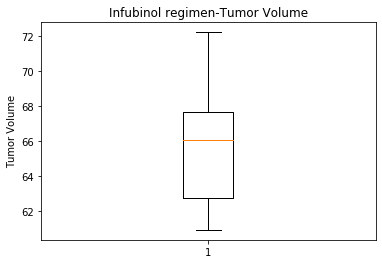

In [336]:
#Box and wisker plot of volume
figure1, axis1 = plt.subplots()
axis1.set_title ("Infubinol regimen-Tumor Volume")
axis1.set_ylabel ("Tumor Volume")
axis1.boxplot(infubinol_conv)

In [339]:
# CEFTAMIN BOX PLOT
ceftamin_df = max_volume_df[max_volume_df["Drug Regimen"].isin(["Ceftamin"])]
ceftamin_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,493,a275,Ceftamin,Female,20,28,45,62.999356,3
1,993,j296,Ceftamin,Female,24,30,45,61.849023,3
2,1033,k210,Ceftamin,Male,15,28,45,68.923185,3
3,1112,l471,Ceftamin,Female,7,28,45,67.748662,1
4,1132,l661,Ceftamin,Male,18,26,45,59.851956,3


In [340]:
#Execute conversion of the "Tumor Volume" into DF object for the ceftaminl regimen.
ceftaminl_conv = ceftamin_df.sort_values(["Tumor Volume (mm3)"], ascending = True)
ceftaminl_conv = ceftaminl_conv["Tumor Volume (mm3)"]
ceftaminl_conv

1260    59.741901
1132    59.851956
1797    61.386660
1379    61.433892
993     61.849023
493     62.999356
1162    64.299830
1773    64.634949
1855    64.729837
1670    67.527482
1112    67.748662
1845    68.594745
1033    68.923185
Name: Tumor Volume (mm3), dtype: float64

In [341]:
quartiles = ceftaminl_conv.quantile([.25,.5,.75])
upper_qrt = quartiles[0.75]
lower_qrt = quartiles[0.25]
int_qrt = upper_qrt - lower_qrt

print(f"The upper quartile temperature is: {upper_qrt}")
print(f"The lower quartile temperature is: {lower_qrt}")
print(f"The inter-quartile temperature is: {int_qrt}")
print(f"The median temperature is: {quartiles[0.5]}")

upper_bnd = upper_qrt - (1.5*int_qrt)
lower_bnd = lower_qrt - (1.5*int_qrt)
print(f"The values above {upper_bnd} are potential outliers.")
print(f"The values below {lower_bnd} are potential outliers.")

The upper quartile temperature is: 67.52748237
The lower quartile temperature is: 61.43389223
The inter-quartile temperature is: 6.093590140000003
The median temperature is: 64.29983003
The values above 58.387097159999996 are potential outliers.
The values below 52.29350701999999 are potential outliers.


{'whiskers': [<matplotlib.lines.Line2D at 0x1a1d21fcf8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1d1fb2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1d21f4a8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1d202cc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1d202240>],
 'means': []}

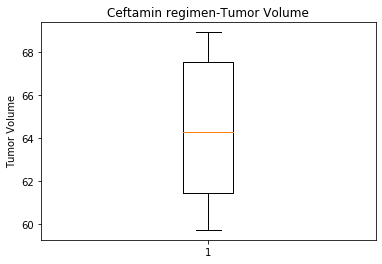

In [342]:
#Box and wisker plot of volume
figure1, axis1 = plt.subplots()
axis1.set_title ("Ceftamin regimen-Tumor Volume")
axis1.set_ylabel ("Tumor Volume")
axis1.boxplot(ceftaminl_conv)

In [343]:
# CEFTAMIN BOX PLOT
capomulin_df = max_volume_df[max_volume_df["Drug Regimen"].isin(["Capomulin"])]
capomulin_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [345]:
#Execute conversion of the "Tumor Volume" into DF object for the Capomulin regimen.
capomulin_conv = capomulin_df.sort_values(["Tumor Volume (mm3)"], ascending = True)
capomulin_conv = capomulin_conv["Tumor Volume (mm3)"]
capomulin_conv

19     23.343598
39     28.430964
29     28.484033
104    31.023923
124    31.896238
134    32.377357
144    33.329098
164    34.455298
224    36.041047
244    37.074024
204    37.311846
337    38.125164
282    38.846876
299    38.939633
309    38.982878
360    40.159220
350    40.658124
370    40.728578
380    41.483008
390    41.581521
440    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [346]:
quartiles = capomulin_conv.quantile([.25,.5,.75])
upper_qrt = quartiles[0.75]
lower_qrt = quartiles[0.25]
int_qrt = upper_qrt - lower_qrt

print(f"The upper quartile temperature is: {upper_qrt}")
print(f"The lower quartile temperature is: {lower_qrt}")
print(f"The inter-quartile temperature is: {int_qrt}")
print(f"The median temperature is: {quartiles[0.5]}")

upper_bnd = upper_qrt - (1.5*int_qrt)
lower_bnd = lower_qrt - (1.5*int_qrt)
print(f"The values above {upper_bnd} are potential outliers.")
print(f"The values below {lower_bnd} are potential outliers.")

The upper quartile temperature is: 40.1592203
The lower quartile temperature is: 32.37735684
The inter-quartile temperature is: 7.781863460000004
The median temperature is: 37.31184577
The values above 28.486425109999995 are potential outliers.
The values below 20.70456164999999 are potential outliers.


{'whiskers': [<matplotlib.lines.Line2D at 0x1a1d982dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1da27d68>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1d9826a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1d98b6d8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1da15240>],
 'means': []}

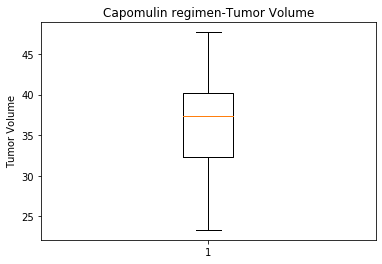

In [347]:
#Box and wisker plot of volume
figure1, axis1 = plt.subplots()
axis1.set_title ("Capomulin regimen-Tumor Volume")
axis1.set_ylabel ("Tumor Volume")
axis1.boxplot(capomulin_conv)

## Line and Scatter Plots

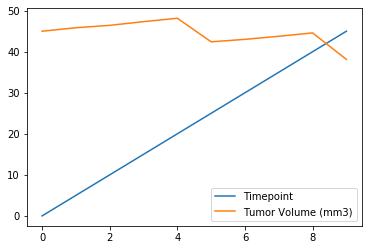

In [371]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#LINE PLOT 
tv_tp = study_data_complete_df[study_data_complete_df["Mouse ID"].isin(["j119"])]
tv_tp
tv_tp_data_point = tv_tp[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
tv_tp_data_point

line_plot=tv_tp_data_point.reset_index()

final_data = line_plot[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

line_graph_plot = final_data.plot.line()

In [405]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capo_scatter_plt = study_data_complete_df.loc[study_data_complete_df["Drug Regimen"]== "Capomulin"]
capo_scatter_plt.head()

#isolate columns of interest using locate function
column_iso = capo_scatter_plt.loc[:,["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
column_iso.head()


,Mouse ID,Weight (g),Tumor Volume (mm3)
10,s185,17,45.000000
11,s185,17,43.878496
12,s185,17,37.614948
13,s185,17,38.177232
14,s185,17,36.866876


In [406]:
#Get avg tomor volume for the indiviual mouse under the capomulin regimen & column rename
capomulin_avg = pd.DataFrame (column_iso.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
capomulin_avg.head()

capomulin_avg = capomulin_avg.rename(columns = {"Tumor Volume (mm3)": "Volume Average"})
capomulin_avg.head()


,Mouse ID,Weight (g),Volume Average
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


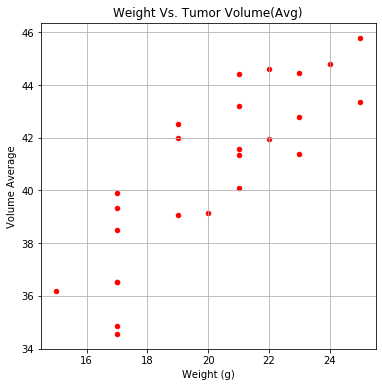

In [413]:
#The scatter plot 

capomulin_avg.plot(kind="scatter", x="Weight (g)", y="Volume Average", grid=True, figsize=(6,6),color =["red"],
    title="Weight Vs. Tumor Volume(Avg)")
plt.show()

## Correlation and Regression

Correlation factor between weight and tumor volume is 0.84


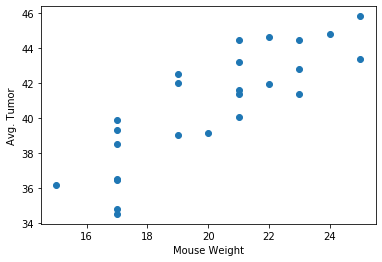

In [422]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Correlation build out
mice_weight = capomulin_avg.iloc[:,1]
tumor_avg = capomulin_avg.iloc[:,2]
correlations = st.pearsonr(mice_weight, tumor_avg)

#create graph showing correlation & simple labeling 
plt.scatter(mice_weight,tumor_avg)
plt.xlabel("Mouse Weight")
plt.ylabel("Avg. Tumor")

#print out correlation info using correlations variable. 
print(f"Correlation factor between weight and tumor volume is {round(correlations[0],2)}")
plt.show()

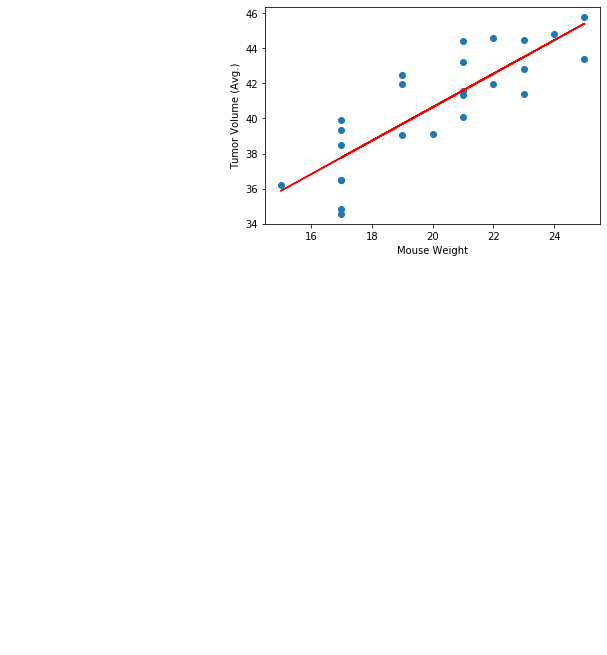

In [438]:
from scipy.stats import linregress

#regression buildout 

x_values = capomulin_avg['Weight (g)']
y_values = capomulin_avg['Volume Average']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume (Avg.)')
plt.show()

